# Q4 Data Mayhem: Conjuring insights from the data (9 Marks)
## Advanced Data Analysis and Prediction
**Description:** This section will involve investigating unusual data patterns, building predictive models, and reducing dimensionality to gain deeper insights.


In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./TaxiData_fixed.csv')

### 4.a Outliers in Fare and Tips (4 Marks):

#### (a) Use box plots to identify outliers in fare and tip values.

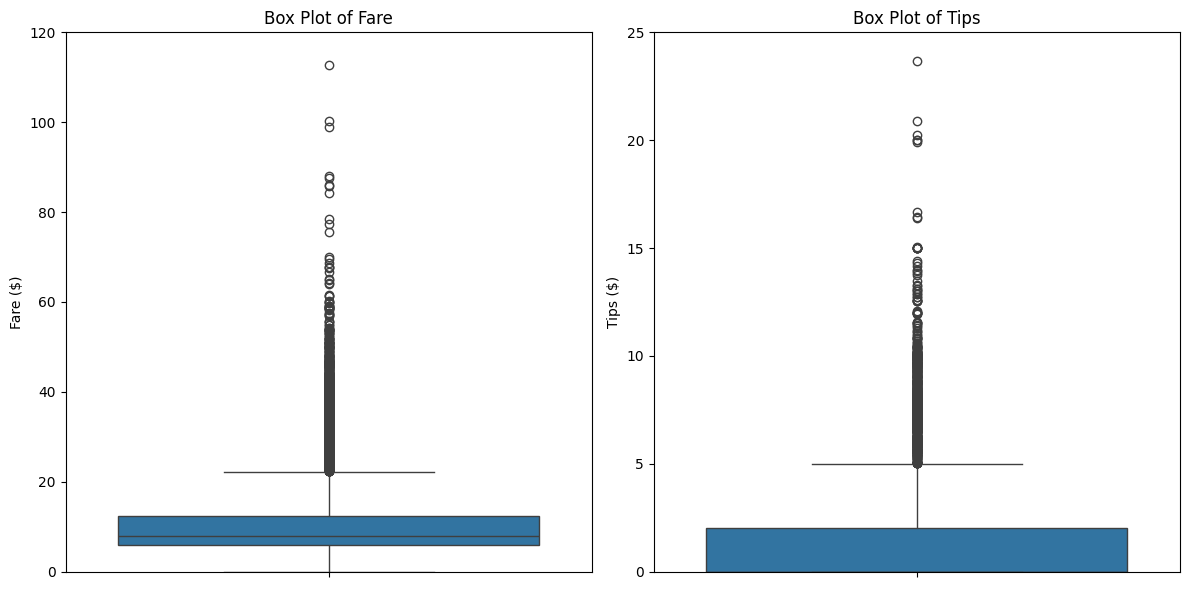

In [3]:
plt.figure(figsize=(12, 6))

# Box plot for fare
plt.subplot(1, 2, 1)
sns.boxplot(y='fare', data=df)
plt.ylim(0, 120)
plt.title('Box Plot of Fare')
plt.ylabel('Fare ($)')

# Box plot for tips
plt.subplot(1, 2, 2)
sns.boxplot(y='tips', data=df)
plt.ylim(0,25)
plt.title('Box Plot of Tips')
plt.ylabel('Tips ($)')

plt.tight_layout()
plt.show()

In [4]:
# Identifying outliers using IQR method for both fare and tips
def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Identify outliers in fare and tips
fare_outliers = identify_outliers(df['fare'])
tips_outliers = identify_outliers(df['tips'])

print(f"Number of fare outliers: {len(fare_outliers)}")
print(f"Number of tips outliers: {len(tips_outliers)}")

Number of fare outliers: 1872
Number of tips outliers: 839


#### (b) Interpretation: Discuss how these outliers might skew average calculations.

Outliers can significantly skew average calculations by pulling the mean toward extreme values, which can mask the true central tendency of the data. In the case of fares, high outliers tend to inflate the average, creating a misleading impression that fares are generally higher than they actually are. Similarly, although there are fewer outliers in tip amounts, they still elevate the mean, suggesting that typical tips are larger than they really are. By removing these outliers, the averages provide a clearer picture that better reflects the typical fare and tip amounts. As we can see from the averages with and without outliers below, this adjustment clarifies the data’s central trend, offering insights that align more closely with everyday patterns.

In [ ]:
# mean with outliers
fare_mean = df['fare'].mean()
tips_mean = df['tips'].mean()

# Removing outliers
df = df[~df['fare'].isin(fare_outliers)]
df = df[~df['tips'].isin(tips_outliers)]

# mean without outliers
fare_mean_no_outliers = df['fare'].mean()
tips_mean_no_outliers = df['tips'].mean()

print(f"Mean fare with outliers: {fare_mean}")
print(f"Mean fare without outliers: {fare_mean_no_outliers}")
print(f"Mean tips with outliers: {tips_mean}")
print(f"Mean tips without outliers: {tips_mean_no_outliers}")

Mean fare with outliers: 11.768216237834956
Mean fare without outliers: 8.37464375715922
Mean tips with outliers: 1.0766744434075457
Mean tips without outliers: 0.6477006491027111


#### (c) Suggest methods for handling these outliers in predictive models (e.g., removal or adjustment).

To handle outliers in predictive models, we can:
- **Remove Outliers**: Exclude extreme values that don’t add value, but ensure they’re not relevant for prediction.
- **Winsorize**: Cap extreme values at a certain percentile to reduce skew without removing data.
- **Transform Data**: Apply logarithmic or square root transformations to reduce the impact of outliers.
- **Use Robust Models**: Try tree-based models or robust regressions, which are less sensitive to outliers.
- **Flag Outliers**: Instead of removing, add a feature flagging outliers to capture any associated patterns.

### 4.b Predicting Fare (5 Marks):

#### (a) Implement a regression model using distance, trip duration, and location as predictors to estimate fares.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define predictors and target
X = df[['trip_miles', 'trip_seconds', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
y = df['fare']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### (b) Model Evaluation: Present metrics such as RMSE to assess model accuracy.

In [7]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 3.10


#### (c) Discuss the effectiveness of the model, noting any potential limitations or areas for improvement.

The linear regression model I implemented provides a solid baseline for predicting fare based on trip miles, trip duration, and pickup/drop-off locations. By looking at the Root Mean Squared Error (RMSE), we get a sense of how close the model’s predictions are to the actual fares, with a lower RMSE indicating better performance. However, there are some limitations and areas where the model could be improved:
- **Linearity Assumption**: The model assumes a linear relationship, which may not capture complex factors like traffic or surge pricing.
- **Feature Engineering**: Adding features like time of day or day of the week could improve predictions.
- **Outlier Handling**: Removing or adjusting outliers might reduce their impact on the model.
- **Non-linear Models**: Trying decision trees or ensemble methods like Random Forest could capture more complex relationships.
- **Regularization**: Techniques like Lasso or Ridge regression could help prevent overfitting and improve generalization.

These adjustments could enhance the model's accuracy and robustness.
